# Merge datasets together

### All datasets from 2014: (1) deceased organ donation number ; (2) population ; (3) death rate per 10,000 ; (4) cathlolics population percentage

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import statistics
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('dataset/Catholics by State.xlsx')

In [32]:
df = df.reset_index()

In [47]:
df.head()

,index,% of adults (2014),Total State Sample
0,Alabama,0.07,511
1,Alaska,0.16,310
2,Arizona,0.21,653
3,Arkansas,0.08,311
4,California,0.28,3697


In [68]:
df = df.rename(columns={'index':'STATE'})

In [39]:
df2 = pd.read_excel('dataset/Deceased_Donor_by_states_2014.xlsx')

In [40]:
df2 = df2.reset_index()

In [48]:
df2.head()

,index,2014
0,Alabama,135
1,Alaska,28
2,Arizona,159
3,Arkansas,82
4,California,881


In [69]:
df2 = df2.rename(columns={'index':'STATE'})

In [49]:
df3 = pd.read_csv('dataset/death_rate_2014.csv')

In [52]:
df3.head()

,Location,"Death Rate per 100,000"
0,United States,724.6
1,Alabama,909.1
2,Alaska,736.8
3,Arizona,661.7
4,Arkansas,883.7


In [59]:
df4 = pd.read_excel('dataset/population_by_states_clean.xlsx')

In [61]:
df4['Area'] = df4['Area'].str.replace(r'.', '')

In [62]:
df4.head()

,Area,2014
0,Alabama,4843214
1,Alaska,736705
2,Arizona,6719993
3,Arkansas,2966912
4,California,38680810


In [98]:
df['STATE'] = df['STATE'].str.strip()
df2['STATE'] = df2['STATE'].str.strip()
df_all = df.merge(df2, left_on='STATE', right_on='STATE', how='left')

In [100]:
df_all = df_all.merge(df3, left_on='STATE', right_on='Location', how='left')

In [102]:
df_all = df_all.merge(df4, left_on='STATE', right_on='Area', how='left')

In [105]:
df_all = df_all.rename(columns={'2014_x': 'deceased_donator', '2014_y': 'population'})

In [118]:
df_all = df_all.rename(columns={'% of adults (2014)': 'Catholics_percent'})

In [115]:
df_all = df_all.drop(labels=['Location', 'Area'], axis=1)

In [121]:
df_all.head()

,STATE,Catholics_percent,Total State Sample,deceased_donator,"Death Rate per 100,000",population
0,Alabama,0.07,511,135,909.1,4843214
1,Alaska,0.16,310,28,736.8,736705
2,Arizona,0.21,653,159,661.7,6719993
3,Arkansas,0.08,311,82,883.7,2966912
4,California,0.28,3697,881,605.7,38680810


In [122]:
df_all['deceased_donator/mill_population'] = df_all['deceased_donator'] / (df_all['population'] / 1000000)

In [125]:
df_all['death_rate_percent'] = df_all['Death Rate per 100,000'] * 100000 / df_all['population']

In [127]:
df_all = df_all.drop(labels='death_rate_percent', axis=1)

In [131]:
Alabama_death = df_all['Death Rate per 100,000'][0]

In [135]:
df_all['DPM_normalized'] = df_all['deceased_donator/mill_population'] * (Alabama_death / df_all['Death Rate per 100,000'])

In [161]:
df_all.head()

,Catholics_percent,Total State Sample,deceased_donator,"Death Rate per 100,000",population,deceased_donator/mill_population,DPM_normalized
STATE,,,,,,,
Alabama,7.0,511,135,909.1,4843214,27.874052,27.87
Alaska,16.0,310,28,736.8,736705,38.007072,46.89
Arizona,21.0,653,159,661.7,6719993,23.660739,32.51
Arkansas,8.0,311,82,883.7,2966912,27.638164,28.43
California,28.0,3697,881,605.7,38680810,22.776152,34.18


In [169]:
df_all.to_csv('US_organ_donation')

In [147]:
df_all['DPM_normalized'] = df_all['DPM_normalized'].round(decimals=2)

In [149]:
df_all['Catholics_percent'] = df_all['Catholics_percent'] * 100

In [158]:
df_all['Catholics_percent'] = df_all['Catholics_percent'].round(decimals=0)

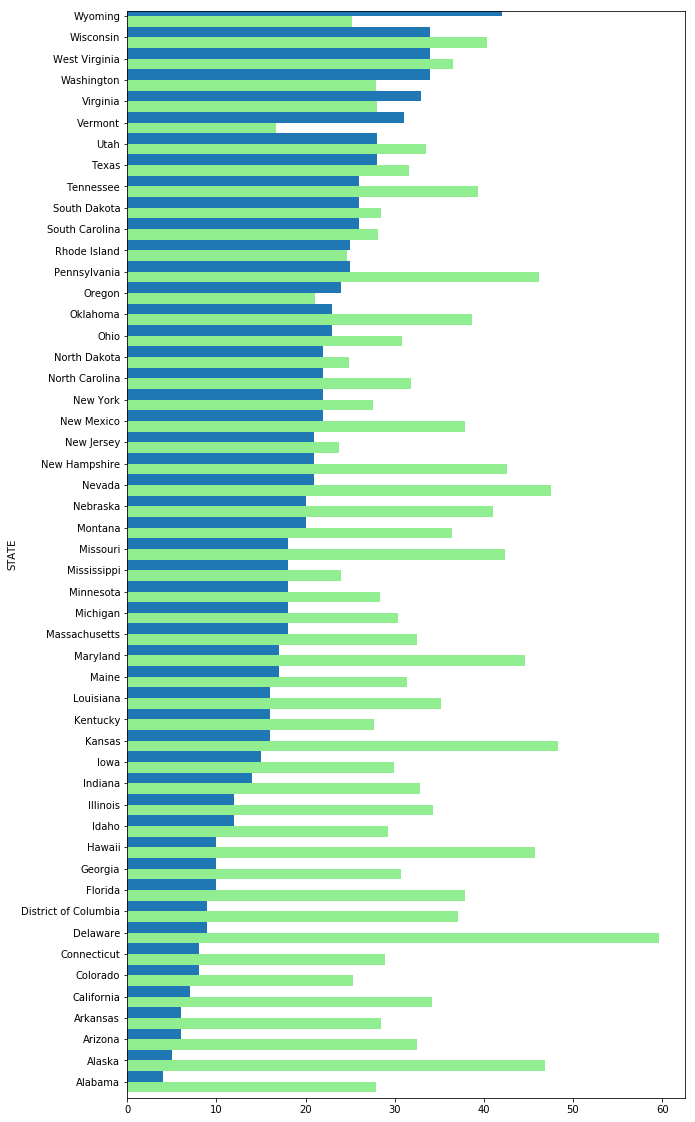

In [160]:
fig, ax = plt.subplots(figsize=(10,20))
df_all['Catholics_percent'].sort_values(ascending=True).plot(kind='barh', figsize=(10,20), ax=ax, position=0)
df_all['DPM_normalized'].plot(kind='barh', ax=ax, position=1, color='lightgreen')

In [162]:
df_all.head()

,Catholics_percent,Total State Sample,deceased_donator,"Death Rate per 100,000",population,deceased_donator/mill_population,DPM_normalized
STATE,,,,,,,
Alabama,7.0,511,135,909.1,4843214,27.874052,27.87
Alaska,16.0,310,28,736.8,736705,38.007072,46.89
Arizona,21.0,653,159,661.7,6719993,23.660739,32.51
Arkansas,8.0,311,82,883.7,2966912,27.638164,28.43
California,28.0,3697,881,605.7,38680810,22.776152,34.18


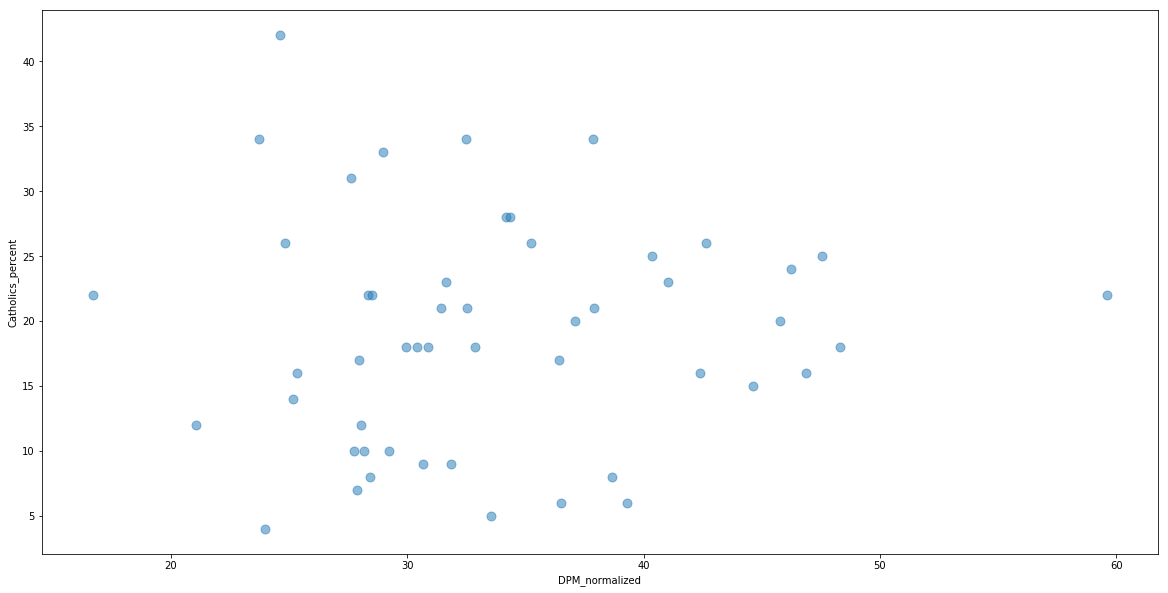

In [168]:
df_all.plot(kind="scatter", x='DPM_normalized', y='Catholics_percent', figsize=(20,10), alpha=0.5, s=80,)